# 📊 Preparación de datos - Factores de anemia

- Miguel Angel Vélez Suarez
- Samuel Pérez Hurtado

1. Integración de los datos
2. Eliminar variables irrelevantes y redundantes
3. Descripción estadística de los datos
4. Limpieza de datos
5. Análisis de correlaciones
6. Transformación de tipo de variable según el método de ML
7. Guardar los datos preparados

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

# 1. Integración de datos

In [2]:
# Cargamos los datos
data = pd.read_csv("data/anemia.csv")
data.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33924 entries, 0 to 33923
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   33924 non-null  object 
 1   Type of place of residence                                             33924 non-null  object 
 2   Highest educational level                                              33924 non-null  object 
 3   Wealth index combined                                                  33924 non-null  object 
 4   Births in last five years                                              33924 non-null  int64  
 5   Age of respondent at 1st birth                                         33924 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null 

In [4]:
# Se eliminan los registros con valores nulos en la columna "Anemia level"
data = data.dropna(subset=["Anemia level"])

In [5]:
# Se corrige la variable "When child put to breast" para que sea numérica
data['When child put to breast'] = data['When child put to breast'].replace({'Immediately': 0, 'Hours: 1': 60, 'Days: 1': 1440})

In [6]:
# Corrección del tipo de datos object a categorías y float
data['Age in 5-year groups'] = data['Age in 5-year groups'].astype('category')
data['Type of place of residence'] = data['Type of place of residence'].astype('category')
data['Highest educational level'] = data['Highest educational level'].astype('category')
data['Wealth index combined'] = data['Wealth index combined'].astype('category')
data['Anemia level'] = data['Anemia level'].astype('category')
data['Have mosquito bed net for sleeping (from household questionnaire)'] = data['Have mosquito bed net for sleeping (from household questionnaire)'].astype('category')
data['Smokes cigarettes'] = data['Smokes cigarettes'].astype('category')
data['Current marital status'] = data['Current marital status'].astype('category')
data['Currently residing with husband/partner'] = data['Currently residing with husband/partner'].astype('category')
data['When child put to breast'] = data['When child put to breast'].astype('float64')
data['Had fever in last two weeks'] = data['Had fever in last two weeks'].astype('category')
data['Taking iron pills, sprinkles or syrup'] = data['Taking iron pills, sprinkles or syrup'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13136 entries, 3 to 33922
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   Age in 5-year groups                                                   13136 non-null  category
 1   Type of place of residence                                             13136 non-null  category
 2   Highest educational level                                              13136 non-null  category
 3   Wealth index combined                                                  13136 non-null  category
 4   Births in last five years                                              13136 non-null  int64   
 5   Age of respondent at 1st birth                                         13136 non-null  int64   
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-nu

# 2. Eliminar variables irrelevantes y redundantes

In [8]:
# Se elimina la columna que según la fuente de datos es igual a otra
data.drop(columns=["Anemia level.1"], inplace=True)


In [9]:
# Se eliminan las columnas que según el experto no son relevantes
data.drop(columns=['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)', 'Highest educational level', 'Births in last five years', 'Age of respondent at 1st birth', 'Current marital status', 'Currently residing with husband/partner'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13136 entries, 3 to 33922
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   Age in 5-year groups                                                   13136 non-null  category
 1   Type of place of residence                                             13136 non-null  category
 2   Wealth index combined                                                  13136 non-null  category
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null  float64 
 4   Anemia level                                                           13136 non-null  category
 5   Have mosquito bed net for sleeping (from household questionnaire)      13136 non-null  category
 6   Smokes cigarettes                                                      13136 non-nu

# 3. Descripción estadística

In [11]:
#Conocemos un poco los datos numéricos
data.describe()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast
count,13136.000000,8181.000000
mean,114.367235,164.383938
std,15.915408,384.082632
min,20.000000,0.000000
25%,105.000000,0.000000
50%,115.000000,60.000000
75%,125.000000,104.000000
max,218.000000,1440.000000


array([[<Axes: title={'center': 'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'}>,
        <Axes: title={'center': 'When child put to breast'}>]],
      dtype=object)

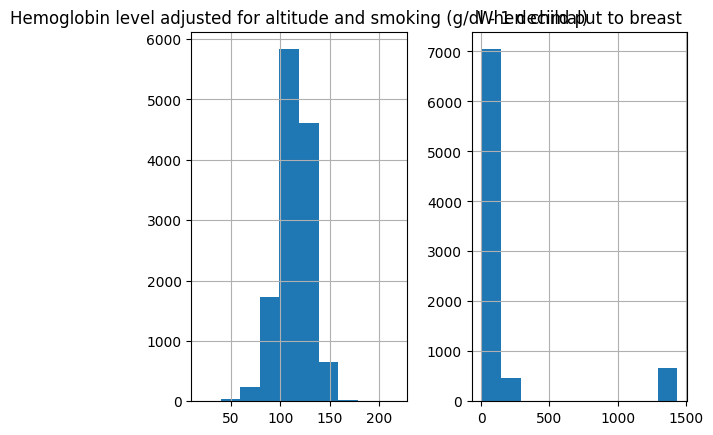

In [12]:
#Conocemos las variables categóricas: bar, barh, pie
data.hist()

<Axes: >

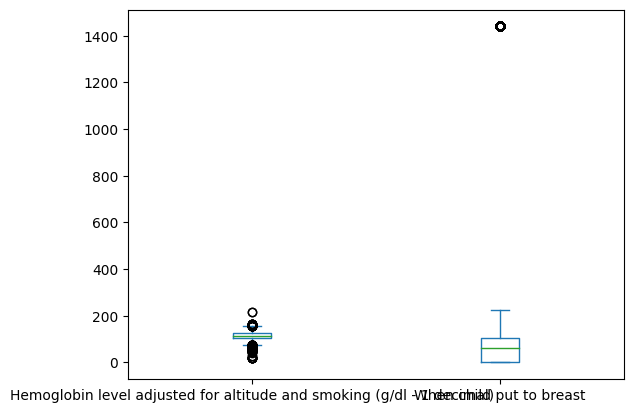

In [13]:
data.plot.box()

array([[<Axes: xlabel='Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', ylabel='Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'>,
        <Axes: xlabel='When child put to breast', ylabel='Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'>],
       [<Axes: xlabel='Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', ylabel='When child put to breast'>,
        <Axes: xlabel='When child put to breast', ylabel='When child put to breast'>]],
      dtype=object)

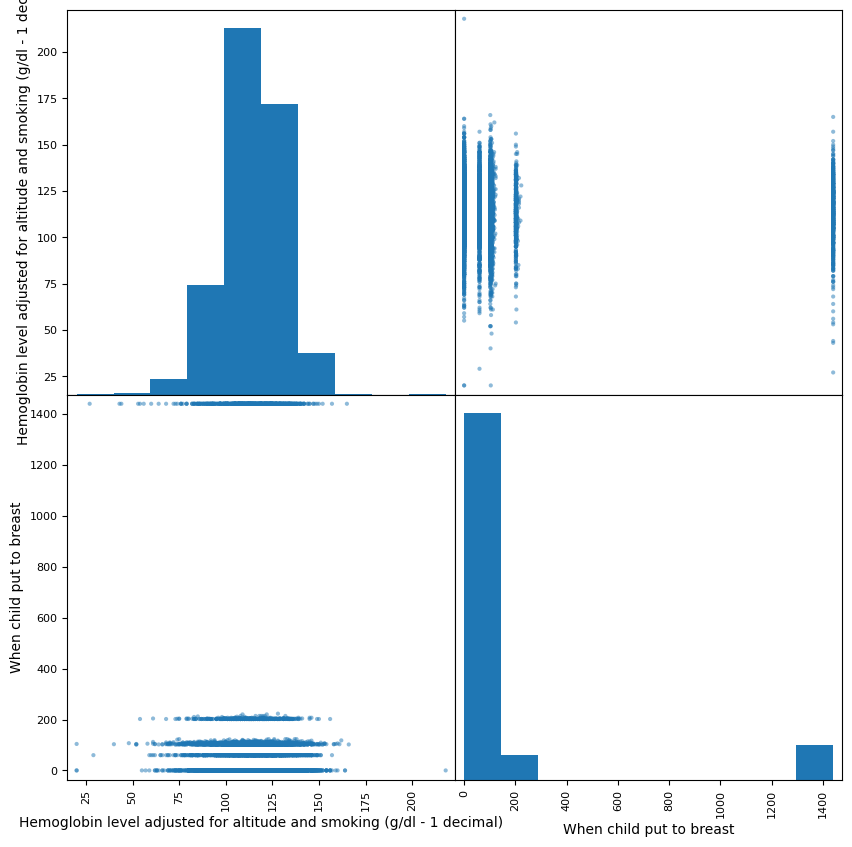

In [14]:
# Gráficas para identificar relaciones entre las variables
pd.plotting.scatter_matrix(data, figsize=(10,10))

In [15]:
# Instalar pandas profiling
# !pip install ydata-profiling -q

In [16]:
from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=True) # minimal=True
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="data/profile_data.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4.1. Limpieza de datos: atípicos

In [18]:
# Según el experto, los valores mayores a 160 en la hemoglobina son atípicos y se reemplazan por NaN
data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'][data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] > 160] = np.nan

/tmp/ipykernel_85883/1859744285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'][data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] > 160] = np.nan


In [19]:
data['When child put to breast'][data['When child put to breast'] > 400] = np.nan

/tmp/ipykernel_85883/3074995081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['When child put to breast'][data['When child put to breast'] > 400] = np.nan


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13136 entries, 3 to 33922
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   Age in 5-year groups                                                   13136 non-null  category
 1   Type of place of residence                                             13136 non-null  category
 2   Wealth index combined                                                  13136 non-null  category
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13125 non-null  float64 
 4   Anemia level                                                           13136 non-null  category
 5   Have mosquito bed net for sleeping (from household questionnaire)      13136 non-null  category
 6   Smokes cigarettes                                                      13136 non-nu

<Axes: >

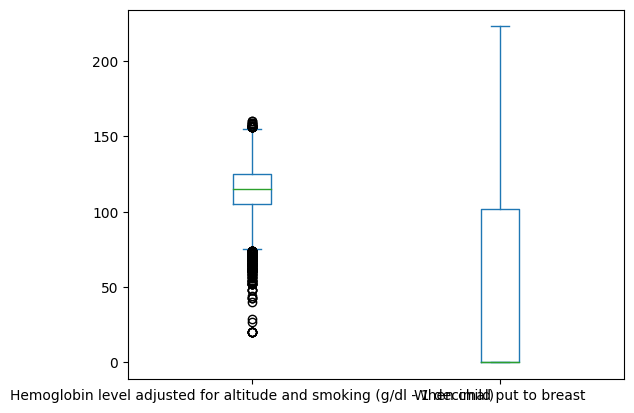

In [21]:
data.plot.box()

# 4.2. Limpieza de datos: imputación

In [22]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']] = ImpNumeros.fit_transform(data[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])

#Imputacion de variables categóricas: moda
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['Had fever in last two weeks', 'Taking iron pills, sprinkles or syrup']] = ImpCategorias.fit_transform(data[['Had fever in last two weeks', 'Taking iron pills, sprinkles or syrup']])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13136 entries, 3 to 33922
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   Age in 5-year groups                                                   13136 non-null  category
 1   Type of place of residence                                             13136 non-null  category
 2   Wealth index combined                                                  13136 non-null  category
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null  float64 
 4   Anemia level                                                           13136 non-null  category
 5   Have mosquito bed net for sleeping (from household questionnaire)      13136 non-null  category
 6   Smokes cigarettes                                                      13136 non-nu

In [23]:
data['Had fever in last two weeks'] = data['Had fever in last two weeks'].astype('category')
data['Taking iron pills, sprinkles or syrup'] = data['Taking iron pills, sprinkles or syrup'].astype('category')

In [24]:
#Valores de la imputación
print(ImpNumeros.statistics_)
print(ImpCategorias.statistics_)

[114.31725714  51.33532934]
['No' 'No']


# 5. Análisis de correlaciones

In [25]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas
# Se codifica la variable objetivo
from sklearn.preprocessing import LabelEncoder
data_codificada = data.copy()
labelencoder = LabelEncoder()
data_codificada["Anemia level"] = labelencoder.fit_transform(data_codificada["Anemia level"])

data_num = pd.get_dummies(data_codificada, drop_first=True, dtype='int64')
data_num.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
3,95.0,1,105.000000,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
5,113.0,0,51.335329,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0
6,121.0,2,0.000000,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1
7,121.0,2,51.335329,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0
9,108.0,1,0.000000,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1


In [26]:
#Correlaciones
# Calcular la matriz de correlación
corr_matrix = data_num.corr()
corr_matrix

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),1.000000,0.331552,-0.049699,-0.023157,0.021448,-0.016241,0.009017,0.011154,0.021494,0.079022,-0.035422,-0.084769,0.031844,0.105647,-0.003103,0.005622,0.034425,-0.033833,-0.020715,0.019702
Anemia level,0.331552,1.000000,-0.012327,-0.005298,0.009009,-0.005795,-0.004557,0.008158,0.024012,0.050819,-0.013659,-0.043449,0.015356,0.069933,0.012576,0.005979,0.013569,-0.012602,0.000802,-0.003699
When child put to breast,-0.049699,-0.012327,1.000000,0.015748,-0.011403,0.000451,-0.019310,-0.009693,0.006404,-0.033163,0.006195,0.093734,-0.044872,-0.043345,0.041810,-0.003212,-0.070485,0.073251,0.030690,-0.027373
Age in 5-year groups_20-24,-0.023157,-0.005298,0.015748,1.000000,-0.291674,-0.255731,-0.212113,-0.125778,-0.079018,-0.066393,0.031729,0.053812,-0.028749,-0.083739,0.020935,0.012025,-0.022259,0.018303,0.020329,-0.025032
Age in 5-year groups_25-29,0.021448,0.009009,-0.011403,-0.291674,1.000000,-0.344313,-0.285586,-0.169346,-0.106389,0.009449,-0.018199,-0.029399,0.056471,-0.010713,0.012563,0.013780,0.004695,-0.005823,-0.009936,0.009296
Age in 5-year groups_30-34,-0.016241,-0.005795,0.000451,-0.255731,-0.344313,1.000000,-0.250393,-0.148478,-0.093279,0.059024,-0.020295,-0.054649,0.022436,0.071145,-0.007149,-0.014315,0.015508,-0.013067,-0.013783,0.015419
Age in 5-year groups_35-39,0.009017,-0.004557,-0.019310,-0.212113,-0.285586,-0.250393,1.000000,-0.123153,-0.077369,0.031847,-0.020874,-0.006922,-0.029467,0.059830,-0.024962,-0.012840,0.001352,-0.000363,-0.007013,0.009340
Age in 5-year groups_40-44,0.011154,0.008158,-0.009693,-0.125778,-0.169346,-0.148478,-0.123153,1.000000,-0.045878,-0.010111,0.003154,0.014855,-0.017089,0.003134,-0.020166,0.006610,-0.001652,0.003238,-0.016850,0.017385
Age in 5-year groups_45-49,0.021494,0.024012,0.006404,-0.079018,-0.106389,-0.093279,-0.077369,-0.045878,1.000000,-0.006088,0.013604,0.030141,-0.019728,-0.022934,0.008106,-0.007986,0.010140,-0.009848,0.007482,-0.007789
Type of place of residence_Urban,0.079022,0.050819,-0.033163,-0.066393,0.009449,0.059024,0.031847,-0.010111,-0.006088,1.000000,-0.223949,-0.316515,0.236870,0.344588,-0.093005,-0.003033,0.067378,-0.068607,-0.110522,0.113652


<Axes: >

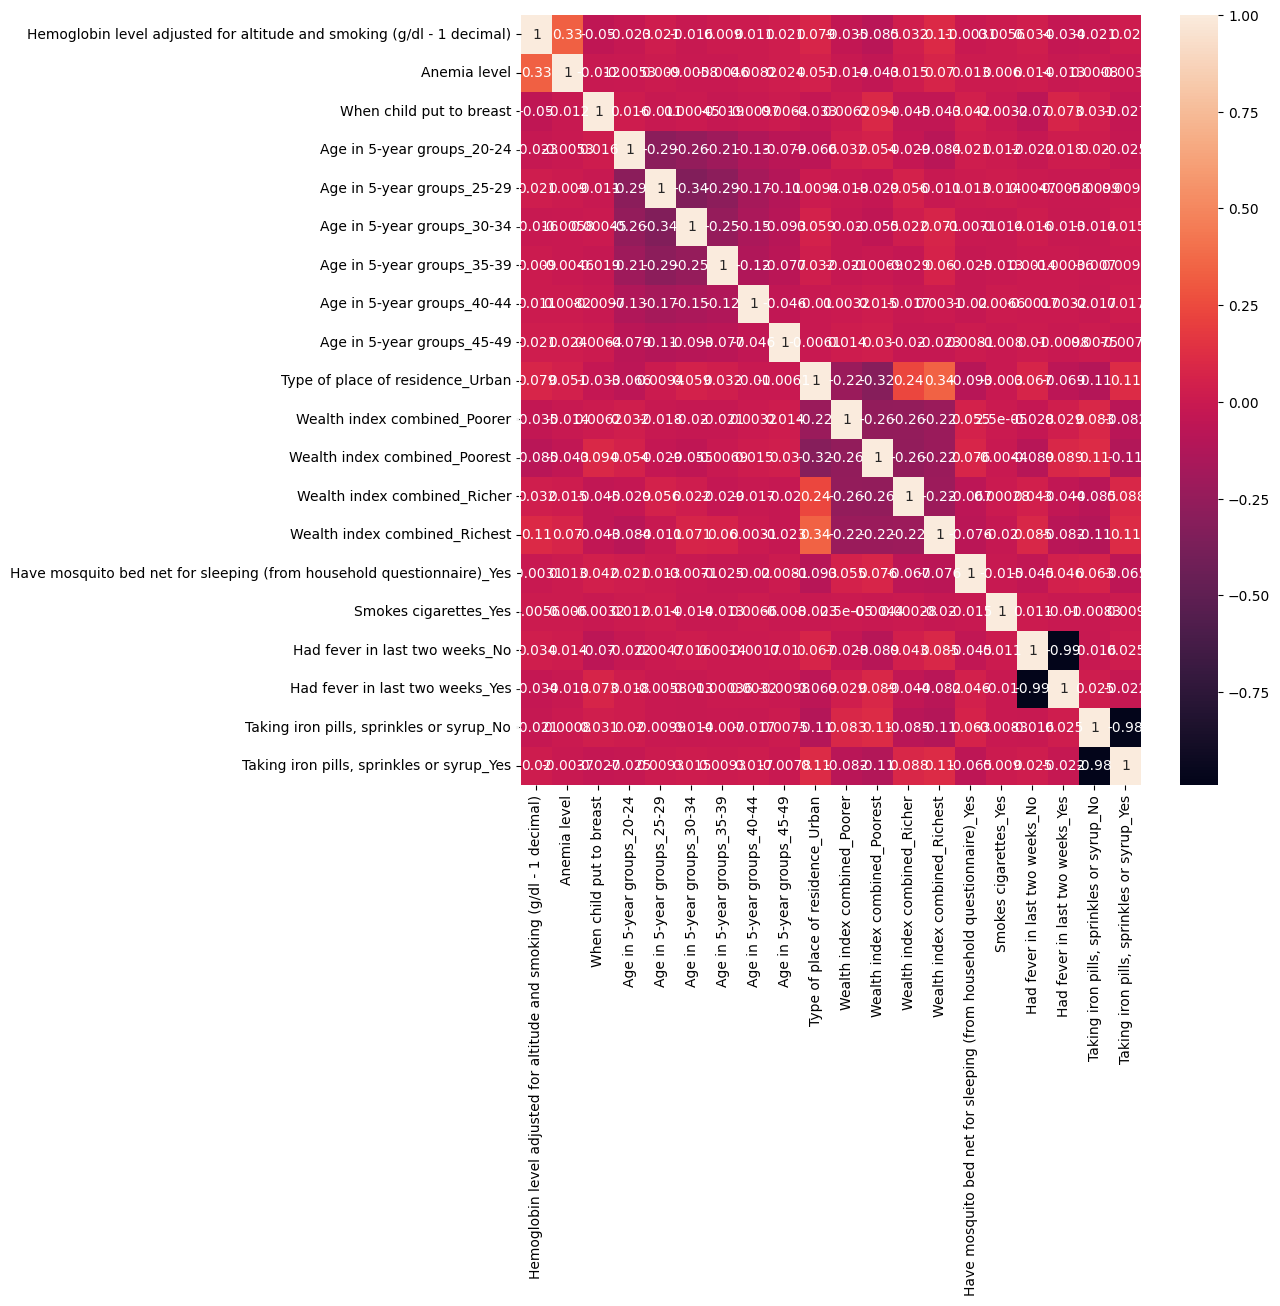

In [27]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

In [28]:
#Detección de redundantes = se buscan correlaciones peligrosamente altas (0.8-1.0)

# Filtrar las variables con una correlación entre 0.8 y 1 en valor absoluto
filtered_vars_altas = corr_matrix[(corr_matrix['Anemia level'].abs() >= 0.8) & (corr_matrix['Anemia level'].abs() <= 1)]['Anemia level']

# Imprimir las variables
print("Variables: ", filtered_vars_altas.index.tolist())

Variables:  ['Anemia level']


In [29]:
#Detección de irrelevantes = se buscan correlaciones peligrosamente bajas (0.0-0.1)

## Filtrar las variables con una correlación entre 0 y 0.1 en valor absoluto
filtered_vars_bajas = corr_matrix[(corr_matrix['Anemia level'].abs() >= 0) & (corr_matrix['Anemia level'].abs() <= 0.05)]['Anemia level']

# Imprimir las variables
print("Variables: ", filtered_vars_bajas.index.tolist())

Variables:  ['When child put to breast', 'Age in 5-year groups_20-24', 'Age in 5-year groups_25-29', 'Age in 5-year groups_30-34', 'Age in 5-year groups_35-39', 'Age in 5-year groups_40-44', 'Age in 5-year groups_45-49', 'Wealth index combined_Poorer', 'Wealth index combined_Poorest', 'Wealth index combined_Richer', 'Have mosquito bed net for sleeping (from household questionnaire)_Yes', 'Smokes cigarettes_Yes', 'Had fever in last two weeks_No', 'Had fever in last two weeks_Yes', 'Taking iron pills, sprinkles or syrup_No', 'Taking iron pills, sprinkles or syrup_Yes']


In [30]:
data.to_csv('data/datos_preparados.csv', index=False)

# 6. Transformaciones según el método de ML

* Normalización, dummies a las predictoras y labelencoder a la objetivo

## 6.1. Normalización: Transformación de categoría a número

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13136 entries, 3 to 33922
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype   
---  ------                                                                 --------------  -----   
 0   Age in 5-year groups                                                   13136 non-null  category
 1   Type of place of residence                                             13136 non-null  category
 2   Wealth index combined                                                  13136 non-null  category
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null  float64 
 4   Anemia level                                                           13136 non-null  category
 5   Have mosquito bed net for sleeping (from household questionnaire)      13136 non-null  category
 6   Smokes cigarettes                                                      13136 non-nu

In [32]:
#Normalización: Sólo para variables numéricas (no dummies)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']] = min_max_scaler.fit_transform(data[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])
data.head()

,Age in 5-year groups,Type of place of residence,Wealth index combined,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,When child put to breast,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
3,25-29,Urban,Richest,0.535714,Moderate,Yes,No,0.470852,No,No
5,30-34,Urban,Richest,0.664286,Mild,Yes,No,0.230203,No,No
6,35-39,Urban,Richest,0.721429,Not anemic,Yes,No,0.000000,No,Yes
7,35-39,Urban,Richest,0.721429,Not anemic,Yes,No,0.230203,No,No
9,20-24,Urban,Richest,0.628571,Moderate,Yes,No,0.000000,No,Yes


## 6.2. Dummies: Transformación de categoría a número

In [33]:
#Variables categóricas con 2 categorías -> Borramos una dummy
data = pd.get_dummies(data, columns=['Age in 5-year groups', 'Type of place of residence', 'Wealth index combined', 'Have mosquito bed net for sleeping (from household questionnaire)', 'Smokes cigarettes', 'Had fever in last two weeks', 'Taking iron pills, sprinkles or syrup'], drop_first=True, dtype='int64')
data.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
3,0.535714,Moderate,0.470852,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
5,0.664286,Mild,0.230203,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0
6,0.721429,Not anemic,0.000000,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1
7,0.721429,Not anemic,0.230203,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0
9,0.628571,Moderate,0.000000,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1


## 6.3. LabelEncoder: Para la variable objetivo

In [34]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Anemia level"] = labelencoder.fit_transform(data["Anemia level"])
data.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
3,0.535714,1,0.470852,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
5,0.664286,0,0.230203,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0
6,0.721429,2,0.000000,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1
7,0.721429,2,0.230203,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0
9,0.628571,1,0.000000,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1


# 7. Guardar los datos preparados

In [35]:
data.to_csv('data/datos_transformados.csv', index=False)